<a href="https://colab.research.google.com/github/koriatul/Final-Project3/blob/main/PYTN_KampusMerdeka_fp3_Koriatul_Qibtiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 3</font></h1> 

<h2> Group 4 <h2>

- Gilbert Aryaduta Pinem
- Dian Pramesti
- Irfan Musa
- Koriatul Qibtiah

PYTN-KS-011 <br> 
Studi Independen - Kampus Merdeka

# 1. PERKENALAN

## 1.1 Latar Belakang

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global. Berdasarkan data global, diperkirakan tiap tahunnya 17.9 juta jiwa direnggut oleh CVD. Oleh karena itu, CVD menyumbang sebanyak 31% dari semua kematian di seluruh dunia. Gagal jantung merupakan peristiwa umum yang disebabkan oleh CVD. Dataset yang akan digunakan berisi 12 atribut untuk memprediksi kematian akibat gagal jantung.

Disisi lain, sebagian besar CVD dapat dicegah dengan mengatasi faktor risiko perilaku. Adapun faktor-faktor yang dimaksud seperti penggunaan tembakau, obesitas, dan penggunaan alkohol berlebihan. Pasien CVD atau seseorang yang rentan terhadap CVD memerlukan deteksi dini agar dapat segera terobati. Oleh karena itu, diperlukan suatu model yang dapat membantu hal tersebut.

## 1.2 Dataset
Dataset yang digunakan adalah dataset yang berjudul heart failure clinical records, diambil dari website kaggle <a href="https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download" title="Heart Failure Prediction">Heart Failure Prediction</a>

Dataset berisikan faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut kolom dengan 299 atribut baris. Atribut yang menjadi target ialah atribut Death Event/Kematian dan atribut lainnya akan menjadi prediktor.

## 1.3 Objektif yang ingin dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ialah :

- Mengetahui faktor-faktor yang memengaruhi prediksi kematian oleh penyakit gagal jantung secara signifikan.
- Memprediksi kematian menggunakan metode ensemble berdasar pada faktor-faktor yang memengaruhinya.

# 2. IMPORT PUSTAKA YANG DIBUTUHKAN

## 2.1 Import Pustaka

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import pickle

import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

Dataset yang digunakan adalah heart_failure_clinical_records_dataset.csv

## 3.1 Proses Data Loading

In [ ]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1DkdCGmdihT77RfVvVnarM-_1g1uxdtQT

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Read Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Menampilkan Dataset
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 3.2 Eksplorasi Data Sederhana

In [ ]:
# Menampilkan informasi tiap kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan hasil diatas diperoleh bahwa dataset ini memiliki tipe data float dan integer, serta tidak ditemukannya missing value pada masing-masing kolom mengingat jumlah nilai non-null di tiap kolom seragam.

In [ ]:
# Melihat bentuk dari dataset
df.shape

(299, 13)

Dataset ini memiliki 299 baris dan 13 kolom.

In [ ]:
# Melihat 5 Data teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Melihat 5 data terbawah
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
# Melihat deskripsi statistik dasar dari tiap atribut
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Diperoleh bahwa : <br>  
- Usia rata-rata pasien yakni berkisar 60 tahun dan tidak sampai 100, melainkan hanya 90. 
- Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 581,84
- Fraksi ejeksi maksimal yang ada pada pasien yaitu 80
- Kreatinin serum minimal yang ada pada pasien yaitu 0,5
- Sodium serum rata-rata pada pasien yaitu 136,63

In [ ]:
# Melihat banyaknya unique values untuk tiap atribut.
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


Diperoleh bahwa unique values yang diperoleh beragam pada tiap kolom.

# 4. DATA CLEANING <br>

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

In [ ]:
# Memberikan nama baru untuk setiap atribut.
df2 = df.rename(columns={'age':'Usia', 'anaemia':'Anaemia','creatinine_phosphokinase':'Kreatinin_fosfokinase', 'diabetes':'Diabetes',
                         'ejection_fraction':'Fraksi_ejeksi', 'high_blood_pressure':'Tekanan_darah_tinggi','platelets':'Platelets', 
                        'serum_creatinine':'Kreatinin_serum', 'serum_sodium':'Sodium_serum','sex':'Jenis_kelamin','smoking':'Perokok', 
                         'time':'Waktu', 'DEATH_EVENT':'Kematian'})

In [ ]:
# Menghilangkan atribut Waktu
df2.drop(columns=['Waktu'], inplace=True)
df2.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Jenis_kelamin,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


Penggantian nama kolom dilakukan untuk memudahkan proses analisis. Selanjutnya, penghapusan atribut waktu dikarenakan atribut waktu dirasa tidak relevan dengan variabel target. Sebab, atribut waktu menunjukkan kuantitas hidup pasien untuk bertahan dengan pengaruh atribut lainnya. Akibatnya, atribut tersebut tidak cocok sebagai variabel independen.

In [ ]:
# Melihat banyaknya nilai dari masing-masing atribut
for col in df2.columns:
    print(col,': ')
    print(df2[col].value_counts())
    print("  ")
    print("  ")

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64
  
  
Anaemia : 
0    170
1    129
Name: Anaemia, dtype: int64
  
  
Kreatinin_fosfokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: Kreatinin_fosfokinase, Length: 208, dtype: int64
  
  
Diabetes : 
0    174
1    125
Name: Diabetes, dtype: int64
  
  
Fraksi_ejeksi :

In [ ]:
# Melakukan pengecekan duplikasi data
df2.duplicated().sum()

0

Diperoleh bahwa tidak ada data yang terduplikat.

In [ ]:
# Membuat dataframe yang serupa dengan dataframe sebelumnya
df3 = df2.copy()
df3.head()

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Jenis_kelamin,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


# 5. EXPLORASI DATA

Bagian ini berisi tentang eksplorasi data pada dataset di atas.

## 5.1 Descriptive Statistics & Query

In [ ]:
# Menampilkan dataframe df3
df3

,Usia,Anaemia,Kreatinin_fosfokinase,Diabetes,Fraksi_ejeksi,Tekanan_darah_tinggi,Platelets,Kreatinin_serum,Sodium_serum,Jenis_kelamin,Perokok,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [ ]:
# Membuat variable num untuk membuat dataframe yang berisi atribut numerik
num = df3.drop(columns=['Anaemia', 'Diabetes', 'Tekanan_darah_tinggi','Jenis_kelamin','Perokok','Kematian'])

Penghapusan pada atribut-atribut di atas dikarenakan atribut di atas merupakan data yang bersifat boolean, jadi tidak dapat dilakukan perhitungan deskriptif statistik

In [ ]:
# Melihat statistik deskriptif data numerik pada dataset
num.describe()

,Usia,Kreatinin_fosfokinase,Fraksi_ejeksi,Platelets,Kreatinin_serum,Sodium_serum
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


Dari hasil di atas, dapat diperoleh bahwa :

- Usia rata-rata pasien dalam data adalah di umur 60
- Rata-rata nilai Kreatin_fosfokinase ada di nilai 581.839, yang mana nilai itu termasuk tinggi. Menurut hellosehat.com, nilai normal Kreatinin fosfokinase untuk laki-laki adalah 39-308 dan untuk perempuan adalah 26-192. Jika hasil tes menunjukkan angka di atas angka normal, maka pasien bisa jadi mengalami cedera atau memiliki penyakit pada otot, jantung, dan otak
- Nilai fraksi ejeksi normal pada manusia menurut Amiliana M. Soesanto pada jurnal Kardiologi Indonesia dengan judul 'Pengukuran Fungsi Sistolik Global Ventrikel Kiri' adalah dengan nilai > 50 %. Jika dilihat dari hasil statistika deskriptif di atas, nilai fraksi ejeksi para kuartil 1-3 ada di bawah angka 50%. Maka nilai tersebut dapat diindikasikan bahwa pasien mengalami masalah fungsi jantung
- Nilai rata-rata kreatinin serum pada pasien berada di angka 1.3 yaitu masih berada di nilai maksimal angka normal. Tetapi untuk nilai tertinggi dari kreatinin serum yang ditemukan berada di nilai 9.4 yang mana angka ini jauh di atas angka normal

Dari nilai-nilai di atas, dapat disimpulkan bahwa para pasien pada data memiliki cedera atau gejala penyakit jantung sampai gagal jantung

In [ ]:
# Membuat variable kat untuk membuat dataframe yang berisi atribut kategorik
kat = df3.drop(columns=['Usia', 'Kreatinin_fosfokinase', 'Fraksi_ejeksi', 'Platelets', 'Kreatinin_serum', 'Sodium_serum']).astype('category')


In [ ]:
# Melihat statistik deskriptif data kategorik pada dataset
kat.describe()

,Anaemia,Diabetes,Tekanan_darah_tinggi,Jenis_kelamin,Perokok,Kematian
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,0,0,0,1,0,0
freq,170,174,194,194,203,203


Diperoleh bahwa:

- Pasien yang **tidak** mengidap anemia yaitu 170 pasien
- Pasien yang **tidak** mengidap diabetes yaitu 174 pasien
- Pasien dengan **tidak** mengidap tekanan darah tinggi yaitu 194 pasien
- Pasien yang **tidak** merokok yakni 203 pasien
- Pasien yang **tidak** meninggal berjumlah 203 pasien

In [ ]:
# Melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-rata usia yang mengalami kematian dan yang tidak
mean1 = df3[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)
mean1

,Usia
Kematian,
0,58.761906
1,65.215281


Diperoleh bahwa rata-rata usia pasien yang meninggal yakni 65 tahun, sedangkan rata-rata pasien yang tidak meninggal atau bertahan hidup berusia 58 tahun

Melihat korelasi antara merokok dengan meninggalnya pasien

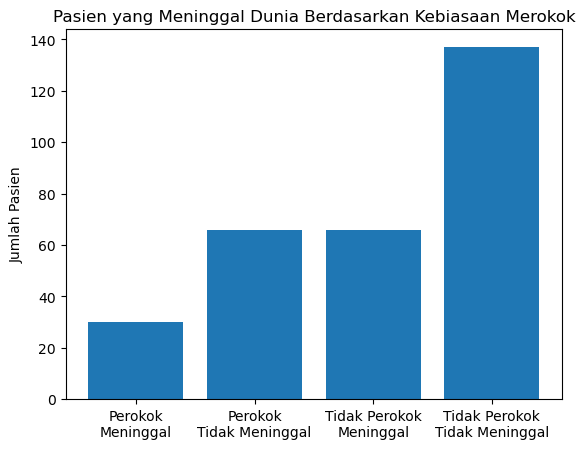

In [ ]:
# Menghitung jumlah pasien untuk setiap kondisi
count_Perokok_meninggal = df3[(df3['Perokok'] == 1) & (df3['Kematian'] == 1)].shape[0]
count_Perokok_tidak_meninggal = df3[(df3['Perokok'] == 1) & (df3['Kematian'] == 0)].shape[0]
count_tidak_Perokok_meninggal = df3[(df3['Perokok'] == 0) & (df3['Kematian'] == 1)].shape[0]
count_tidak_Perokok_tidak_meninggal = df3[(df3['Perokok'] == 0) & (df3['Kematian'] == 0)].shape[0]

# Mengatur label dan nilai untuk sumbu x
labels = ['Perokok\nMeninggal', 'Perokok\nTidak Meninggal', 'Tidak Perokok\nMeninggal', 'Tidak Perokok\nTidak Meninggal']
values = [count_Perokok_meninggal, count_Perokok_tidak_meninggal, count_tidak_Perokok_meninggal, count_tidak_Perokok_tidak_meninggal]

# Membuat chart batang
plt.bar(labels, values)

# Memberi judul dan label sumbu
plt.title('Pasien yang Meninggal Dunia Berdasarkan Kebiasaan Merokok')
plt.ylabel('Jumlah Pasien')

# Menampilkan chart
plt.show()


Dari bar chart di atas, dapat dilihat bahwa pasien yang tidak merokok dan tidak meninggal memiliki angka yang cukup tinggi. Hampir setengah dari sample pasien pada data. Hal ini menunjukkan bahwa kebiasaan tidak merokok juga akan mempengaruhi jantung dan keselamatan kita.

Untuk pasien yang perokok dan meninggal memiliki jumlah yang sedikit, kemungkinan pasien yang meninggal merupakan perokok yang sangat berat sehingga merusak kondisi jantungnya.

Untuk pasien yang tidak merokok tetapi meninggal kemungkinan adalah dipengaruhi oleh faktor-faktor lain yang dapat merusak sistem kerja jantung

In [ ]:
# Melihat persentase kematian
datakematian = pd.DataFrame({"Total":df3['Kematian'].value_counts(), 
                          "Presentase":(df3['Kematian'].value_counts()/df.shape[0])*100})
datakematian

,Total,Presentase
0,203,67.892977
1,96,32.107023


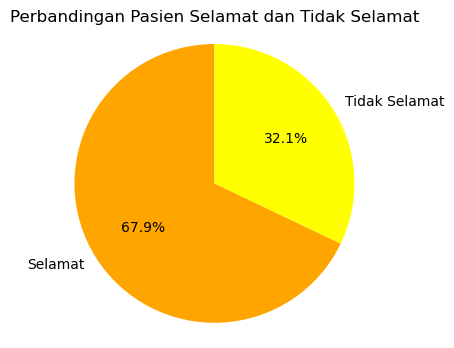

In [ ]:
labels = ['Selamat', 'Tidak Selamat']
data_counts = df3['Kematian'].value_counts()
colors = ['orange', 'yellow']

plt.figure(figsize=(4, 4))
plt.pie(data_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Perbandingan Pasien Selamat dan Tidak Selamat')
plt.show()

Terdapat perbedaan yang cukup signifikan antara pasien selamat dan tidak selamat. Oleh karena itu nantinya kita perlu melakukan resampling.

## 5.2 Correlation Matrix

In [ ]:
df4 = df3.copy()

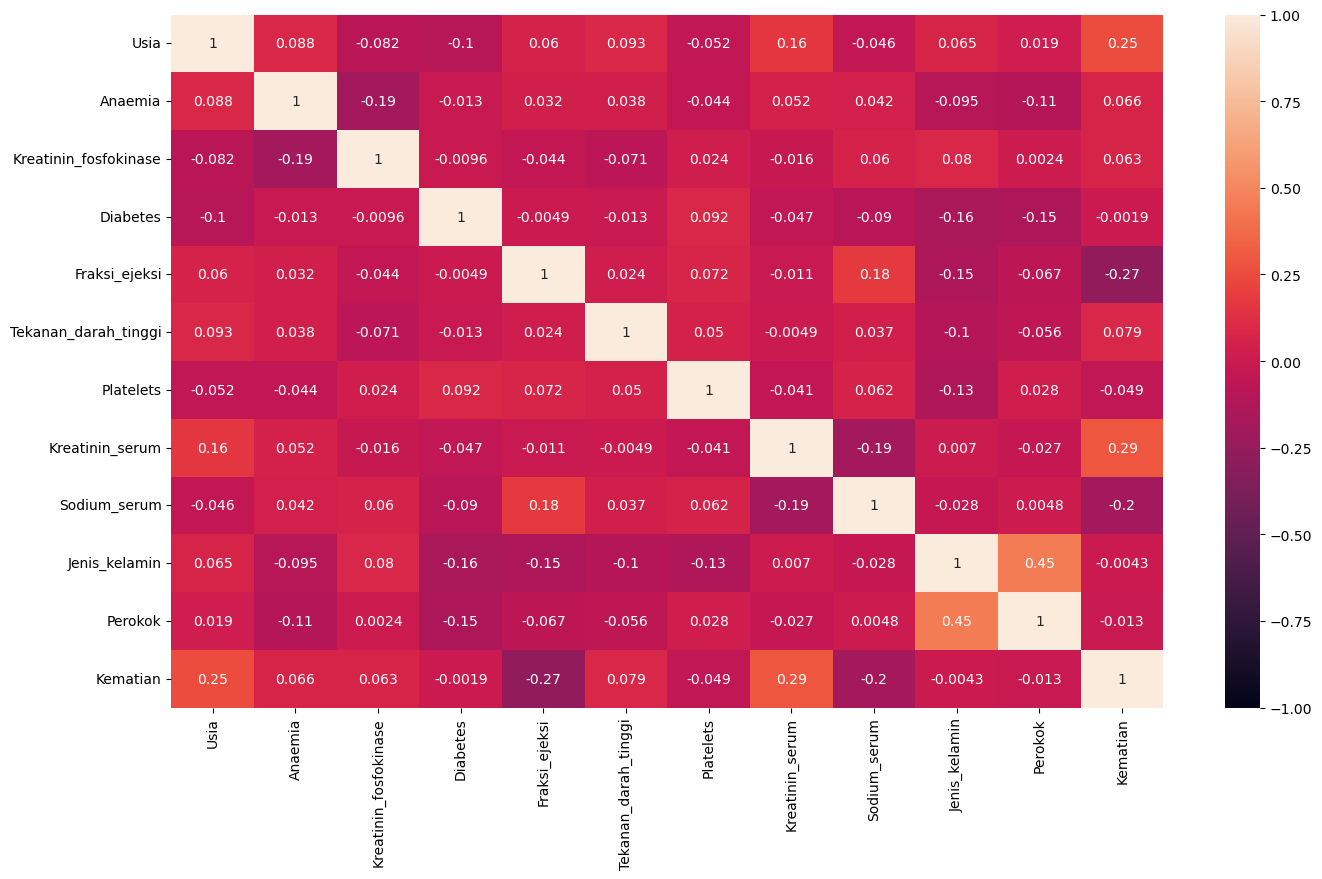

In [ ]:
# Membuat correlation matrix untuk melihat korekasi antara setiap atribut
plt.figure(figsize=(16, 9))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
## Melihat nilai korelasi atribut terhadap kematian
df3.corr()['Kematian'].sort_values(ascending=False)

Kematian                 1.000000
Kreatinin_serum          0.294278
Usia                     0.253729
Tekanan_darah_tinggi     0.079351
Anaemia                  0.066270
Kreatinin_fosfokinase    0.062728
Diabetes                -0.001943
Jenis_kelamin           -0.004316
Perokok                 -0.012623
Platelets               -0.049139
Sodium_serum            -0.195204
Fraksi_ejeksi           -0.268603
Name: Kematian, dtype: float64

Dari nilai korelasi di atas, dapat dilihat bahwa Kreatinin_serum dan Usia memiliki nilai korelasi positif yang tinggi terhadap kematian, Maka nilai atribut tersebut akan sebanding dengan kematian

Untuk Fraksi Ejeksi dan Sodium serum memiliki korelasi negatif yang tinggi terhadap kematian. Maka nilai atribut tersebut akan berbanding terbalik dengan kematian

Keempat hal ini menunjukkan hubungan yang kuat terhadap kematian pasien yang memiliki penyakit jantung.

# 6. DATA PREPROCESSING

## 6.1 Data Asli

Melakukan inisiasi variable X dan y

In [ ]:
# Sebelum Resampling
X = df3.drop(['Kematian'], axis=1)
y = df3['Kematian']
print(X.shape)
print(y.shape)

(299, 11)
(299,)


Dikarenakan data tidak seimbang, kita melakukan resampling data.

### 6.1.1 Feature Importance

Melakukan feature selection dengan library RandomForestClassifier

In [ ]:
# Membuat objek rfc dengan estimasi 100 pohon 
rfc  = RandomForestClassifier(n_estimators=100)

# Melakukan training model dengan X dan y
rfc.fit(X,y)

RandomForestClassifier()

In [ ]:
# Membuat variable f_i untuk mendapatkan nilai feature importance dari setiap atribut pada X 
f_i = rfc.feature_importances_

In [ ]:
# Membuat variable heart untuk melakukan list pada atribut X 
heart = X.columns.tolist()
heart

['Usia',
 'Anaemia',
 'Kreatinin_fosfokinase',
 'Diabetes',
 'Fraksi_ejeksi',
 'Tekanan_darah_tinggi',
 'Platelets',
 'Kreatinin_serum',
 'Sodium_serum',
 'Jenis_kelamin',
 'Perokok']

In [ ]:
# Membuat variable feature_imp untuk membuat series dengan nama atribut dari heart dan juga nilai feature importance nya
feature_imp = pd.Series(f_i,index=heart)

In [ ]:
# Menampilkan feature importance dari nilai tertinggi ke terrendah
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

Kreatinin_serum          0.203397
Fraksi_ejeksi            0.177907
Usia                     0.138307
Platelets                0.133676
Kreatinin_fosfokinase    0.130313
Sodium_serum             0.112815
Diabetes                 0.022145
Anaemia                  0.021179
Perokok                  0.020489
Jenis_kelamin            0.020353
Tekanan_darah_tinggi     0.019418
dtype: float64

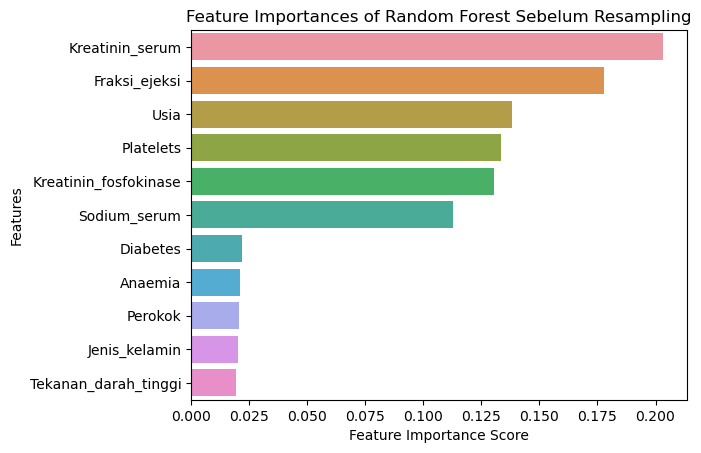

In [ ]:
# Menampilkan plot untuk feature importance 
sns.barplot(x = feature_imp, y=feature_imp.index)

plt.title('Feature Importances of Random Forest Sebelum Resampling')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.show()

Setelah dilakkan pencarian feature importance atau atribut yang paling berpengaruh pada model, akan dilakukan inisiasi final pada variable X yang akan dijadikan data training. Dalam hal ini dipilih 4 feature atau atribut yang memiliki pengaruh paling tinggi pada model yaitu Kreatinin_serum, Fraksi_ejeksi, Usia, dan Kreatinin_fosfokinase

In [ ]:
# Membuat variable bernama X_fit yang berisi 4 atribut yang paling berpengaruh pada kematian pasien penyakit jantung 
X_fit = df3[['Usia', 'Fraksi_ejeksi', 'Kreatinin_serum', 'Sodium_serum']]

In [ ]:
# Melihat isi dataframe X_fit
X_fit

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116
...,...,...,...,...
294,62.0,38,1.1,143
295,55.0,38,1.2,139
296,45.0,60,0.8,138
297,45.0,38,1.4,140


In [ ]:
# Melihat rincian dataframe pada X_fit (sebelum resampling)
X_fit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             299 non-null    float64
 1   Fraksi_ejeksi    299 non-null    int64  
 2   Kreatinin_serum  299 non-null    float64
 3   Sodium_serum     299 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.30, random_state=325)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(209, 4)
(90, 4)


diperoleh berdasarkan pembagian proporsi training data dan testing data , didapat jumlah training dari keseluruhan data , sebanyak 209 data dan data training testing sebanyak 90.

## 6.2 Random Under Sampling

In [ ]:
# Sesudah Resampling
X1 = df4.drop(['Kematian'], axis=1)
y1 = df4['Kematian']
print(X1.shape)
print(y1.shape)

(299, 11)
(299,)


Teknik resampling yang digunakan yaitu Random under-sampling. Teknik ini merupakan teknik resampling data yang digunakan ketika kelas minoritas dalam dataset terlalu sedikit dan ingin menyeimbangkan jumlah sampel pada setiap kelas. Teknik ini mengurangi jumlah sampel pada kelas mayoritas secara acak hingga jumlahnya sama dengan jumlah sampel pada kelas minoritas.

In [ ]:
# Import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X1, y1)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_rus))

Original dataset shape: Counter({0: 203, 1: 96})
Resample dataset shape: Counter({0: 96, 1: 96})


In [ ]:
# Dataframe baru
df_rus = pd.DataFrame(data=x_rus, columns=X1.columns)
df_rus['target'] = y_rus

### 6.2.1 Feature Importance

Melakukan feature selection dengan library RandomForestClassifier

In [ ]:
# Membuat objek rfc dengan estimasi 100 pohon untuk sesudah resampling 
rfc1  = RandomForestClassifier(n_estimators=100)

# Melakukan training model dengan X dan y
rfc1.fit(X1,y1)

RandomForestClassifier()

In [ ]:
# Membuat variable f_i untuk mendapatkan nilai feature importance dari setiap atribut pada X1 
f_i1 = rfc1.feature_importances_

In [ ]:
# Membuat variable heart untuk melakukan list pada atribut X1 
heart1 = X1.columns.tolist()
heart1

['Usia',
 'Anaemia',
 'Kreatinin_fosfokinase',
 'Diabetes',
 'Fraksi_ejeksi',
 'Tekanan_darah_tinggi',
 'Platelets',
 'Kreatinin_serum',
 'Sodium_serum',
 'Jenis_kelamin',
 'Perokok']

In [ ]:
# Membuat variable feature_imp untuk membuat series dengan nama atribut dari heart dan juga nilai feature importance nya
feature_imp1 = pd.Series(f_i1,index=heart1)

In [ ]:
# Menampilkan feature importance dari nilai tertinggi ke terrendah
feature_imp1 = feature_imp1.sort_values(ascending=False)
feature_imp1

Kreatinin_serum          0.204219
Fraksi_ejeksi            0.171533
Usia                     0.143859
Kreatinin_fosfokinase    0.131838
Platelets                0.130422
Sodium_serum             0.116508
Diabetes                 0.023200
Perokok                  0.020747
Tekanan_darah_tinggi     0.020183
Anaemia                  0.019145
Jenis_kelamin            0.018346
dtype: float64

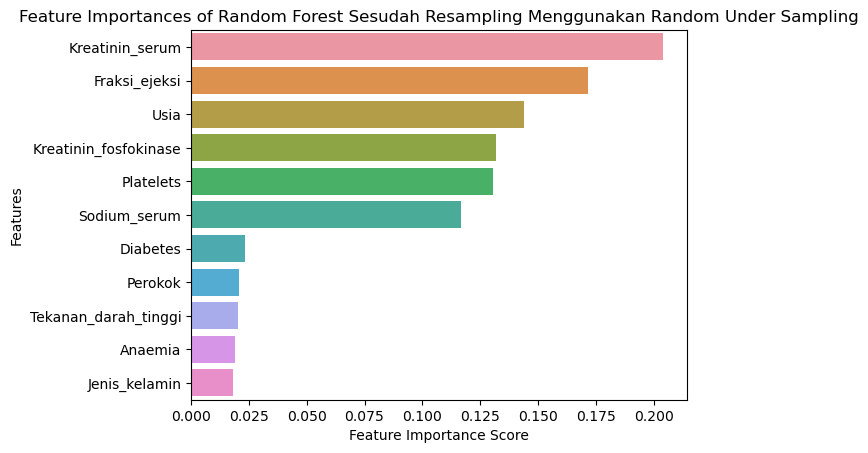

In [ ]:
# Menampilkan plot untuk feature importance sesudah resampling
sns.barplot(x = feature_imp1, y=feature_imp1.index)

plt.title('Feature Importances of Random Forest Sesudah Resampling Menggunakan Random Under Sampling')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.show()

4 feature atau atribut yang memiliki pengaruh paling tinggi pada model yaitu Kreatinin_serum, Fraksi_ejeksi, Usia, dan Kreatinin_fosfokinase

In [ ]:
# Membuat variable bernama X_fit1 yang berisi 4 atribut yang paling berpengaruh pada kematian pasien penyakit jantung
X_fit1 = df_rus[['Usia', 'Fraksi_ejeksi', 'Kreatinin_serum', 'Sodium_serum']]

In [ ]:
# Melihat isi dataframe X_fit1
X_fit1

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,40.0,45,0.90,140
1,45.0,38,0.80,137
2,70.0,60,1.10,145
3,42.0,40,1.20,140
4,73.0,30,1.18,142
...,...,...,...,...
187,73.0,20,1.83,134
188,60.0,30,1.70,127
189,55.0,25,1.10,138
190,65.0,25,1.40,129


In [ ]:
# Melihat rincian dataframe pada X_fit1 (sesudah resampling)
X_fit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             192 non-null    float64
 1   Fraksi_ejeksi    192 non-null    int64  
 2   Kreatinin_serum  192 non-null    float64
 3   Sodium_serum     192 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.1 KB


In [ ]:
# melihat shape dari X_fit
X_fit.shape, X_fit1.shape

((299, 4), (192, 4))

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fit1, y_rus, test_size=0.30, random_state=325)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)

(134, 4)
(58, 4)


diperoleh berdasarkan pembagian proporsi training data dan testing data , didapat jumlah training dari keseluruhan data , sebanyak 134 data dan data training testing sebanyak 58.

## 6.3 SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) adalah metode yang digunakan untuk melakukan oversampling pada dataset yang tidak seimbang secara kelas. Tujuan dari SMOTE adalah menghasilkan sampel sintetis untuk kelas minoritas dengan memanfaatkan tetangga-tetangga terdekat dari sampel minoritas yang ada.

In [ ]:
df5 = df3.copy()

In [ ]:
df5.shape

(299, 12)

In [ ]:
# Sesudah Resampling
X2 = df5.drop(['Kematian'], axis=1)
y2 = df5['Kematian']
print(X2.shape)
print(y2.shape)

(299, 11)
(299,)


In [ ]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X2, y2)

print('Original dataset shape:', Counter(y2))
print('Resample dataset shape:', Counter(y_smote))


Original dataset shape: Counter({0: 203, 1: 96})
Resample dataset shape: Counter({1: 203, 0: 203})


In [ ]:
# Menggabungkan data asli dan data hasil oversampling
df_smote = pd.DataFrame(data=X_smote, columns=X2.columns)
df_smote['target'] = y_smote

### 6.3.1 Feature Importance

Melakukan feature selection dengan library RandomForestClassifier

In [ ]:
# Membuat objek rfc dengan estimasi 100 pohon untuk sesudah resampling 
rfc2  = RandomForestClassifier(n_estimators=100)

# Melakukan training model dengan X2 dan y2
rfc2.fit(X2,y2)

RandomForestClassifier()

In [ ]:
# Membuat variable f_i untuk mendapatkan nilai feature importance dari setiap atribut pada X2
f_i2 = rfc2.feature_importances_

In [ ]:
# Membuat variable heart untuk melakukan list pada atribut X2
heart2 = X2.columns.tolist()
heart2

['Usia',
 'Anaemia',
 'Kreatinin_fosfokinase',
 'Diabetes',
 'Fraksi_ejeksi',
 'Tekanan_darah_tinggi',
 'Platelets',
 'Kreatinin_serum',
 'Sodium_serum',
 'Jenis_kelamin',
 'Perokok']

In [ ]:
# Membuat variable feature_imp untuk membuat series dengan nama atribut dari heart dan juga nilai feature importance nya
feature_imp2 = pd.Series(f_i2,index=heart2)

In [ ]:
# Menampilkan feature importance dari nilai tertinggi ke terrendah
feature_imp2 = feature_imp2.sort_values(ascending=False)
feature_imp2

Kreatinin_serum          0.201984
Fraksi_ejeksi            0.173649
Usia                     0.146112
Platelets                0.127400
Kreatinin_fosfokinase    0.122729
Sodium_serum             0.120028
Diabetes                 0.023521
Jenis_kelamin            0.023171
Anaemia                  0.021577
Tekanan_darah_tinggi     0.020323
Perokok                  0.019507
dtype: float64

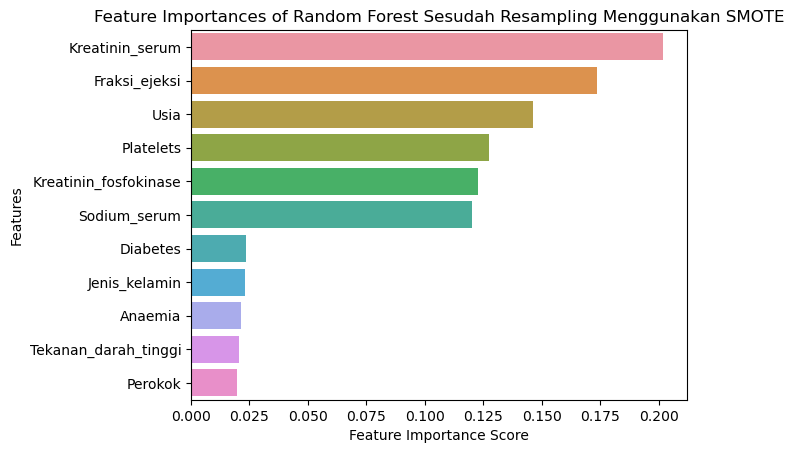

In [ ]:
# Menampilkan plot untuk feature importance sesudah resampling
sns.barplot(x = feature_imp2, y=feature_imp2.index)

plt.title('Feature Importances of Random Forest Sesudah Resampling Menggunakan SMOTE')
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.show()

4 feature atau atribut yang memiliki pengaruh paling tinggi pada model yaitu Kreatinin_serum, Fraksi_ejeksi, Usia, dan Kreatinin_fosfokinase

In [ ]:
# Membuat variable bernama X_fit2 yang berisi 4 atribut yang paling berpengaruh pada kematian pasien penyakit jantung
X_fit2 = df_smote[['Usia', 'Fraksi_ejeksi', 'Kreatinin_serum', 'Sodium_serum']]

In [ ]:
# Melihat isi dataframe X_fit2
X_fit2

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,75.000000,20,1.900000,130
1,55.000000,38,1.100000,136
2,65.000000,20,1.300000,129
3,50.000000,20,1.900000,137
4,65.000000,20,2.700000,116
...,...,...,...,...
401,57.872410,35,4.089378,140
402,71.103083,20,1.830000,134
403,53.664703,33,1.193176,136
404,77.321127,17,2.685521,135


In [ ]:
# Melihat rincian dataframe pada X_fit2 (sesudah resampling)
X_fit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Usia             406 non-null    float64
 1   Fraksi_ejeksi    406 non-null    int64  
 2   Kreatinin_serum  406 non-null    float64
 3   Sodium_serum     406 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.8 KB


In [ ]:
# melihat shape dari X_fit, X_fit1, X_fit2
X_fit.shape, X_fit1.shape, X_fit2.shape

((299, 4), (192, 4), (406, 4))

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_fit2, y_smote, test_size=0.30, random_state=325)

In [ ]:
print(X_train2.shape)
print(X_test2.shape)

(284, 4)
(122, 4)


diperoleh berdasarkan pembagian proporsi training data dan testing data , didapat jumlah training dari keseluruhan data , sebanyak 284 data dan data training testing sebanyak 122.

# 7. PENDEFINISIAN MODEL

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. seperti penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Metode pengujian untuk project ini menggunakan model logistic regression, dengan pembanding yaitu:

- Random Forest Classifier
- Decision Tree
- KNN Classifier <br> 

untuk mengukur kinerja model regresi pada project ini dan untuk menemukan model terbaik.

In [ ]:
# Membuat model pengujian Logistic Regression
model_1 = LogisticRegression() #sebelum resampling
model_1a = LogisticRegression() #random under sampling
model_1b = LogisticRegression() #smote

# Membuat model pengujian Random Forest
model_2 = RandomForestClassifier(n_estimators = 60, random_state = 15) #sebelum resampling
model_2a = RandomForestClassifier(n_estimators = 60, random_state = 15) #random under sampling
model_2b = RandomForestClassifier(n_estimators = 60, random_state = 15) #smote

# Membuat model pengujian Decision Tree
model_3 = DecisionTreeClassifier() #sebelum resampling
model_3a = DecisionTreeClassifier() #random under sampling
model_3b = DecisionTreeClassifier() #smote

# Membuat model pengujian KNN Classifier 
model_4 = KNeighborsClassifier(n_neighbors=16) #sebelum resampling
model_4a = KNeighborsClassifier(n_neighbors=16) #random under sampling
model_4b = KNeighborsClassifier(n_neighbors=16) #smote

# 8. PELATIHAN MODEL

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

## 8.1 Model Logistic Regression

In [ ]:
# Sebelum resampling
model_1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Random under sampling
model_1a.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
# SMOTE
model_1b.fit(X_train2, y_train2)

LogisticRegression()

 ## 8.2 Model Random Forest Classifier

In [ ]:
# Sebelum resampling
model_2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=15)

In [ ]:
# Random Under Sampling
model_2a.fit(X_train1, y_train1)

RandomForestClassifier(n_estimators=60, random_state=15)

In [ ]:
# SMOTE
model_2b.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=60, random_state=15)

## 8.3 Model Decision Tree Classifier

In [ ]:
# Sebelum resampling
model_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Random Under Sampling
model_3a.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [ ]:
# SMOTE
model_3b.fit(X_train2, y_train2)

DecisionTreeClassifier()

## 8.4 Model KNN Classifier

In [ ]:
# Sebelum resampling
model_4.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
# Random Under Sampling
model_4a.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
# SMOTE
model_4b.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=16)

# 9. EVALUASI MODEL

## 9.1 Logistic Regression

In [ ]:
lr = LogisticRegression()

# Model sebelum resampling
model_1.fit(X_train, y_train)
y_pred1 = model_1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

print("A. DATA ASLI")
print('\n Classification Report:')
print(classification_report(y_test, y_pred1))
print('Ringkasan')
print('Akurasi:', accuracy1)
print('Presisi:', precision_score(y_test, y_pred1))
print('Recall:', recall_score(y_test, y_pred1))
print('F1 Score:', f1_score(y_test, y_pred1))
print('\n===============================================')

# RANDOM UNDER SAMPLING
model_1a.fit(X_train1, y_train1)
y_pred1a = model_1a.predict(X_test1)
accuracy1a = accuracy_score(y_test1, y_pred1a)
print("\n B. RANDOM UNDER SAMPLING")
print('\n Classification Report:')
print(classification_report(y_test1, y_pred1a))
print('Ringkasan')
print('Akurasi:', accuracy1a)
print('Presisi:', precision_score(y_test1, y_pred1a))
print('Recall:', recall_score(y_test1, y_pred1a))
print('F1 Score:', f1_score(y_test1, y_pred1a))
print('\n===============================================')

# SMOTE
model_1b.fit(X_train2, y_train2)
y_pred1b = model_1b.predict(X_test2)
accuracy1b = accuracy_score(y_test2, y_pred1b)
print("\n C. SMOTE")
print('\n Classification Report:')
print(classification_report(y_test2, y_pred1b))
print('Ringkasan')
print('Akurasi:', accuracy1b)
print('Presisi:', precision_score(y_test2, y_pred1b))
print('Recall:', recall_score(y_test2, y_pred1b))
print('F1 Score:', f1_score(y_test2, y_pred1b))

A. DATA ASLI

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        62
           1       0.50      0.29      0.36        28

    accuracy                           0.69        90
   macro avg       0.61      0.58      0.58        90
weighted avg       0.66      0.69      0.66        90

Ringkasan
Akurasi: 0.6888888888888889
Presisi: 0.5
Recall: 0.2857142857142857
F1 Score: 0.36363636363636365


 B. RANDOM UNDER SAMPLING

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.77      0.82      0.79        28

    accuracy                           0.79        58
   macro avg       0.79      0.79      0.79        58
weighted avg       0.79      0.79      0.79        58

Ringkasan
Akurasi: 0.7931034482758621
Presisi: 0.7666666666666667
Recall: 0.8214285714285714
F1 Score: 0.793103448275862


 C. SMOTE

 Classificati

In [ ]:
print('CONFUSION MATRIX SEBELUM RESAMPLING:')
print(confusion_matrix(y_test, y_pred1))
print('\n CONFUSION MATRIX RANDOM UNDER SAMPLING:')
print(confusion_matrix(y_test1, y_pred1a))
print('\n CONFUSION MATRIX SMOTE:')
print(confusion_matrix(y_test2, y_pred1b))

CONFUSION MATRIX SEBELUM RESAMPLING:
[[54  8]
 [20  8]]

 CONFUSION MATRIX RANDOM UNDER SAMPLING:
[[23  7]
 [ 5 23]]

 CONFUSION MATRIX SMOTE:
[[48 14]
 [13 47]]


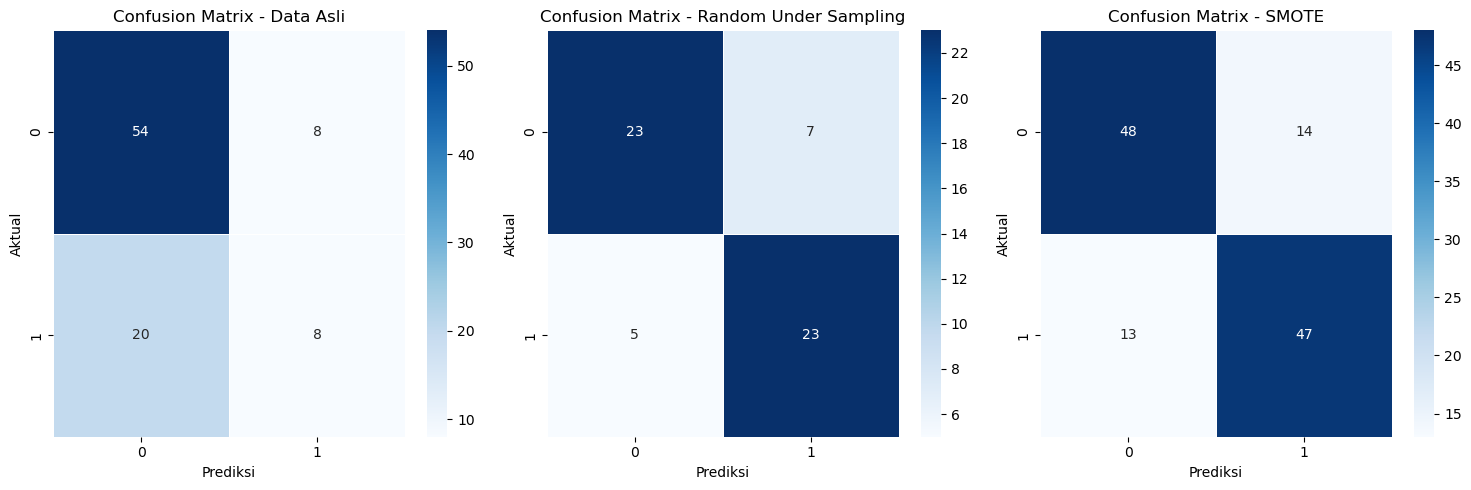

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix - Data Asli
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmap pertama (Data Asli)
cm_original = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm_original, annot=True, fmt="d", linewidths=.5, cmap='Blues', ax=axes[0])

axes[0].set_title('Confusion Matrix - Data Asli')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Confusion matrix - (Random Under Sampling)
cm_ru = confusion_matrix(y_test1, y_pred1a)
sns.heatmap(cm_ru, annot=True, fmt="d", linewidths=.5, cmap='Blues', ax=axes[1])

axes[1].set_title('Confusion Matrix - Random Under Sampling')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Confusion matrix - (SMOTE)
cm_sm = confusion_matrix(y_test2, y_pred1b)
sns.heatmap(cm_sm, annot=True, fmt="d", linewidths=.5, cmap='Blues', ax=axes[2])

axes[2].set_title('Confusion Matrix - SMOTE')
axes[2].set_xlabel('Prediksi')
axes[2].set_ylabel('Aktual')

plt.tight_layout()
plt.show()


## 9.2 Random Forest Classifier

In [ ]:
# sebelum resampling
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train, y_train)
y_pred2 = model_2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("A. DATA ASLI")
print('\n Classification Report:')
print(classification_report(y_test, y_pred2))
print('Ringkasan')
print('Akurasi:', accuracy2)
print('Presisi:', precision_score(y_test, y_pred2))
print('Recall:', recall_score(y_test, y_pred2))
print('F1 Score:', f1_score(y_test, y_pred2))
print('\n =============================================================')

# RANDOM UNDER SAMPLING
model_2a = RandomForestClassifier(random_state=42)
model_2a.fit(X_train1, y_train1)
y_pred2a = model_2a.predict(X_test1)
accuracy2a = accuracy_score(y_test1, y_pred2a)
print("\n B. RANDOM UNDER SAMPLING")
print('\n Classification Report:')
print(classification_report(y_test1, y_pred2a))
print('Ringkasan')
print('Akurasi:', accuracy2a)
print('Presisi:', precision_score(y_test1, y_pred2a))
print('Recall:', recall_score(y_test1, y_pred2a))
print('F1 Score:', f1_score(y_test1, y_pred2a))
print('\n =============================================================')

# SMOTE
model_2b = RandomForestClassifier(random_state=42)
model_2b.fit(X_train2, y_train2)
y_pred2b = model_2b.predict(X_test2)
accuracy2b = accuracy_score(y_test2, y_pred2b)
print("\n C. SMOTE")
print('\n Classification Report:')
print(classification_report(y_test2, y_pred2b))
print('Ringkasan')
print('Akurasi:', accuracy2b)
print('Presisi:', precision_score(y_test2, y_pred2b))
print('Recall:', recall_score(y_test2, y_pred2b))
print('F1 Score:', f1_score(y_test2, y_pred2b))

A. DATA ASLI

 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        62
           1       0.50      0.39      0.44        28

    accuracy                           0.69        90
   macro avg       0.62      0.61      0.61        90
weighted avg       0.67      0.69      0.68        90

Ringkasan
Akurasi: 0.6888888888888889
Presisi: 0.5
Recall: 0.39285714285714285
F1 Score: 0.44


 B. RANDOM UNDER SAMPLING

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.75      0.86      0.80        28

    accuracy                           0.79        58
   macro avg       0.80      0.80      0.79        58
weighted avg       0.80      0.79      0.79        58

Ringkasan
Akurasi: 0.7931034482758621
Presisi: 0.75
Recall: 0.8571428571428571
F1 Score: 0.7999999999999999


 C. SMOTE

 Classification Report:
              pr

In [ ]:
print('CONFUSION MATRIX DATA ASLI:')
print(confusion_matrix(y_test, y_pred2))
print('\n CONFUSION MATRIX RANDOM UNDER SAMPLING:')
print(confusion_matrix(y_test1, y_pred2a))
print('\n CONFUSION MATRIX SMOTE:')
print(confusion_matrix(y_test2, y_pred2b))

CONFUSION MATRIX DATA ASLI:
[[51 11]
 [17 11]]

 CONFUSION MATRIX RANDOM UNDER SAMPLING:
[[22  8]
 [ 4 24]]

 CONFUSION MATRIX SMOTE:
[[47 15]
 [17 43]]


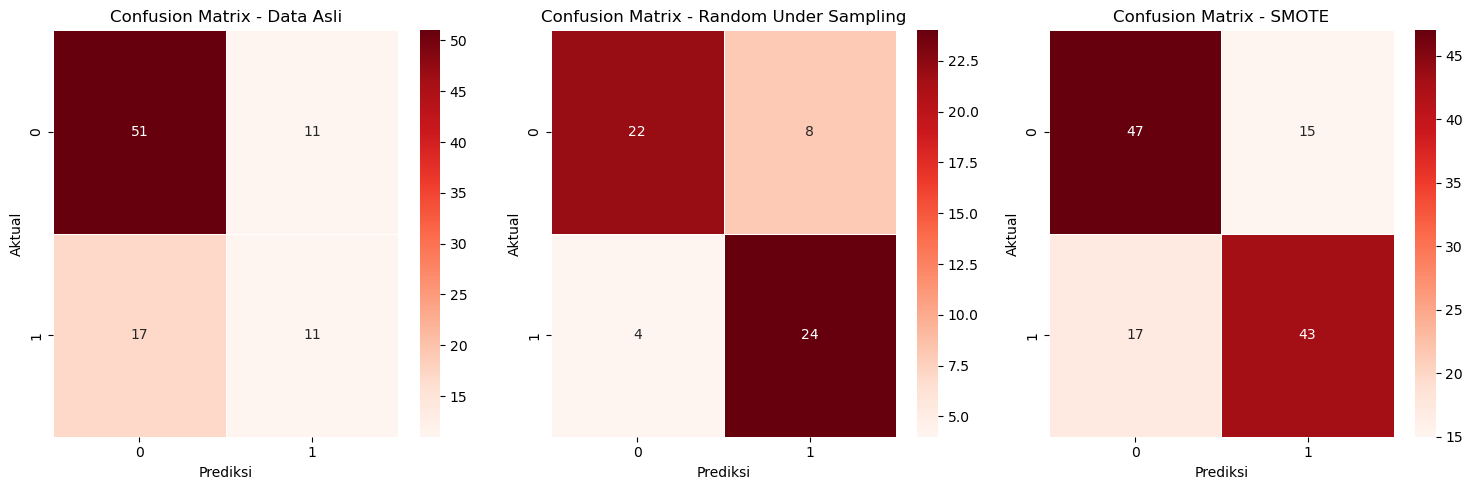

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmap pertama
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap='Reds', ax=axes[0])

axes[0].set_title('Confusion Matrix - Data Asli')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Confusion matrix - (Random Under Sampling)
cm2a = confusion_matrix(y_test1, y_pred2a)
sns.heatmap(cm2a, annot=True, fmt="d", linewidths=.5, cmap='Reds', ax=axes[1])

axes[1].set_title('Confusion Matrix - Random Under Sampling')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Confusion matrix - (SMOTE)
cm2b = confusion_matrix(y_test2, y_pred2b)
sns.heatmap(cm2b, annot=True, fmt="d", linewidths=.5, cmap='Reds', ax=axes[2])

axes[2].set_title('Confusion Matrix - SMOTE')
axes[2].set_xlabel('Prediksi')
axes[2].set_ylabel('Aktual')

plt.tight_layout()
plt.show()


## 9.3 Model Decision Tree Classifier

In [ ]:
# DATA ASLI
model_3 = DecisionTreeClassifier(random_state=42)
model_3.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

print('A. DATA ASLI')
print('Classification Report:')
print(classification_report(y_test, y_pred3))
print('Ringkasan')
print('Akurasi:', accuracy3)
print('Presisi:', precision_score(y_test, y_pred3))
print('Recall:', recall_score(y_test, y_pred3))
print('F1 Score:', f1_score(y_test, y_pred3))
print('=============================================================')

# RANDOM UNDER SAMPLING
model_3a = DecisionTreeClassifier(random_state=42)
model_3a.fit(X_train1, y_train1)
y_pred3a = model_3a.predict(X_test1)
accuracy3a = accuracy_score(y_test1, y_pred3a)

print('B. RANDOM UNDER SAMPLING')
print('Classification Report:')
print(classification_report(y_test1, y_pred3a))
print('Ringkasan')
print('Akurasi:', accuracy3a)
print('Presisi:', precision_score(y_test1, y_pred3a))
print('Recall:', recall_score(y_test1, y_pred3a))
print('F1 Score:', f1_score(y_test1, y_pred3a))
print('=============================================================')

# SMOTE
model_3b = DecisionTreeClassifier(random_state=42)
model_3b.fit(X_train2, y_train2)
y_pred3b = model_3b.predict(X_test2)
accuracy3b = accuracy_score(y_test2, y_pred3b)

print('C. SMOTE')
print('Classification Report:')
print(classification_report(y_test2, y_pred3b))
print('Ringkasan')
print('Akurasi:', accuracy3b)
print('Presisi:', precision_score(y_test2, y_pred3b))
print('Recall:', recall_score(y_test2, y_pred3b))
print('F1 Score:', f1_score(y_test2, y_pred3b))

A. DATA ASLI
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        62
           1       0.50      0.36      0.42        28

    accuracy                           0.69        90
   macro avg       0.62      0.60      0.60        90
weighted avg       0.67      0.69      0.67        90

Ringkasan
Akurasi: 0.6888888888888889
Presisi: 0.5
Recall: 0.35714285714285715
F1 Score: 0.41666666666666663
B. RANDOM UNDER SAMPLING
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.65      0.61      0.63        28

    accuracy                           0.66        58
   macro avg       0.66      0.65      0.65        58
weighted avg       0.66      0.66      0.65        58

Ringkasan
Akurasi: 0.6551724137931034
Presisi: 0.6538461538461539
Recall: 0.6071428571428571
F1 Score: 0.6296296296296297
C. SMOTE
Classification Report:

In [ ]:
print('CONFUSION MATRIX DATA ASLI:')
print(confusion_matrix(y_test, y_pred3))
print('\n CONFUSION RANDOM UNDER SAMPLING:')
print(confusion_matrix(y_test1, y_pred3a))
print('\n CONFUSION MATRIX SMOTE:')
print(confusion_matrix(y_test2, y_pred3b))

CONFUSION MATRIX DATA ASLI:
[[52 10]
 [18 10]]

 CONFUSION RANDOM UNDER SAMPLING:
[[21  9]
 [11 17]]

 CONFUSION MATRIX SMOTE:
[[50 12]
 [19 41]]


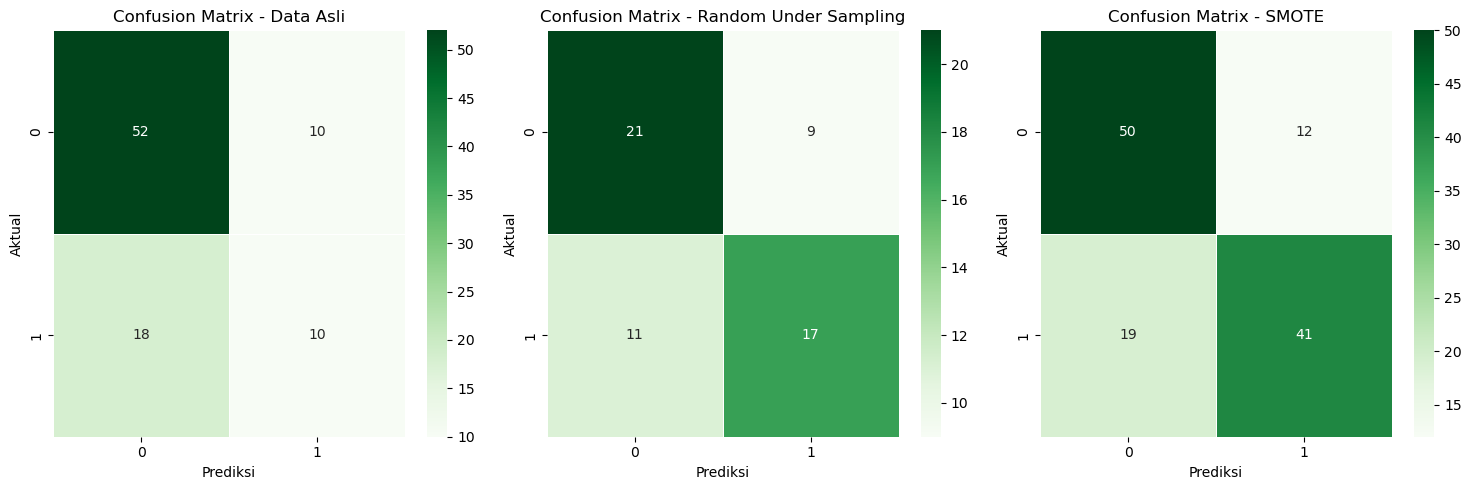

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmap pertama
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap='Greens', ax=axes[0])

axes[0].set_title('Confusion Matrix - Data Asli')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Plot heatmap kedua
cm3a = confusion_matrix(y_test1, y_pred3a)
sns.heatmap(cm3a, annot=True, fmt="d", linewidths=.5, cmap='Greens', ax=axes[1])

axes[1].set_title('Confusion Matrix - Random Under Sampling')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Plot heatmap ketiga
cm3b = confusion_matrix(y_test2, y_pred3b)
sns.heatmap(cm3b, annot=True, fmt="d", linewidths=.5, cmap='Greens', ax=axes[2])

axes[2].set_title('Confusion Matrix - SMOTE')
axes[2].set_xlabel('Prediksi')
axes[2].set_ylabel('Aktual')

plt.tight_layout()
plt.show()


## 9.4 KNN Classifier

In [ ]:
# DATA ASLI
model_4 = KNeighborsClassifier()
model_4.fit(X_train, y_train)
y_pred4 = model_4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)

print('A. DATA ASLI')
print('Classification Report:')
print(classification_report(y_test, y_pred4))
print('Ringkasan')
print('Akurasi:', accuracy4)
print('Presisi:', precision_score(y_test, y_pred4))
print('Recall:', recall_score(y_test, y_pred4))
print('F1 Score:', f1_score(y_test, y_pred4))
print('=============================================================')

# RANDOM UNDER SAMPLING
model_4a = KNeighborsClassifier()
model_4a.fit(X_train1, y_train1)
y_pred4a = model_4a.predict(X_test1)
accuracy4a = accuracy_score(y_test1, y_pred4a)

print('B. RANDOM UNDER SAMPLING')
print('Classification Report:')
print(classification_report(y_test1, y_pred4a))
print('Ringkasan')
print('Akurasi:', accuracy4a)
print('Presisi:', precision_score(y_test1, y_pred4a))
print('Recall:', recall_score(y_test1, y_pred4a))
print('F1 Score:', f1_score(y_test1, y_pred4a))
print('=============================================================')

# SMOTE
model_4b = KNeighborsClassifier()
model_4b.fit(X_train2, y_train2)
y_pred4b = model_4b.predict(X_test2)
accuracy4b = accuracy_score(y_test2, y_pred4b)

print('C. SMOTE')
print('Classification Report:')
print(classification_report(y_test2, y_pred4b))
print('Ringkasan')
print('Akurasi:', accuracy4b)
print('Presisi:', precision_score(y_test2, y_pred4b))
print('Recall:', recall_score(y_test2, y_pred4b))
print('F1 Score:', f1_score(y_test2, y_pred4b))

A. DATA ASLI
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        62
           1       0.60      0.32      0.42        28

    accuracy                           0.72        90
   macro avg       0.67      0.61      0.62        90
weighted avg       0.70      0.72      0.69        90

Ringkasan
Akurasi: 0.7222222222222222
Presisi: 0.6
Recall: 0.32142857142857145
F1 Score: 0.41860465116279066
B. RANDOM UNDER SAMPLING
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.74      0.82      0.78        28

    accuracy                           0.78        58
   macro avg       0.78      0.78      0.78        58
weighted avg       0.78      0.78      0.78        58

Ringkasan
Akurasi: 0.7758620689655172
Presisi: 0.7419354838709677
Recall: 0.8214285714285714
F1 Score: 0.7796610169491526
C. SMOTE
Classification Report:

In [ ]:
print('CONFUSION MATRIX DATA ASLI:')
print(confusion_matrix(y_test, y_pred4))
print('\n CONFUSION MATRIX RANDOM UNDER SAMPLING:')
print(confusion_matrix(y_test1, y_pred4a))
print('\n CONFUSION MATRIX SMOTE:')
print(confusion_matrix(y_test2, y_pred4b))

CONFUSION MATRIX DATA ASLI:
[[56  6]
 [19  9]]

 CONFUSION MATRIX RANDOM UNDER SAMPLING:
[[22  8]
 [ 5 23]]

 CONFUSION MATRIX SMOTE:
[[43 19]
 [18 42]]


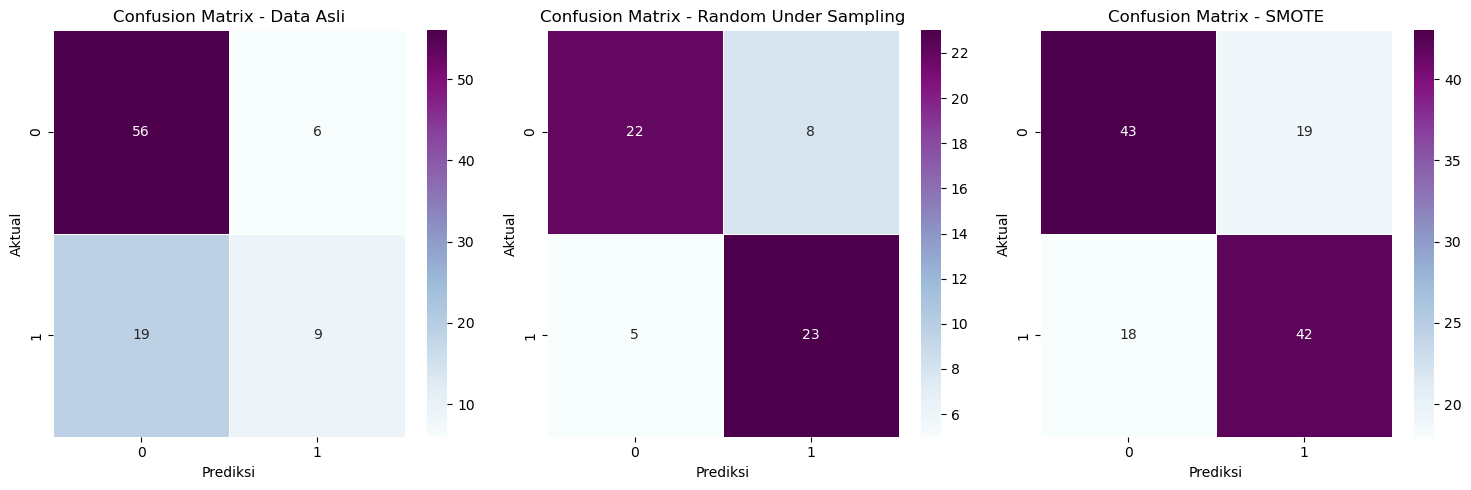

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmap pertama
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap='BuPu', ax=axes[0])

axes[0].set_title('Confusion Matrix - Data Asli')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Plot heatmap kedua
cm4a = confusion_matrix(y_test1, y_pred4a)
sns.heatmap(cm4a, annot=True, fmt="d", linewidths=.5, cmap='BuPu', ax=axes[1])

axes[1].set_title('Confusion Matrix - Random Under Sampling')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Plot heatmap ketiga
cm4b = confusion_matrix(y_test2, y_pred4b)
sns.heatmap(cm4b, annot=True, fmt="d", linewidths=.5, cmap='BuPu', ax=axes[2])

axes[2].set_title('Confusion Matrix - SMOTE')
axes[2].set_xlabel('Prediksi')
axes[2].set_ylabel('Aktual')

plt.tight_layout() 
plt.show()

# 10. MODEL INFERENCE

Ensemble model adalah sebuah pendekatan di dalam machine learning yang menggabungkan beberapa model (biasanya model yang berbeda) untuk meningkatkan performa dan keakuratan prediksi. Ensemble model mencoba menggabungkan prediksi dari beberapa model yang berbeda untuk mendapatkan hasil yang lebih baik daripada menggunakan model tunggal. Kelompok kami menggunakan metode Hard Voting yaitu menggabungkan prediksi dari beberapa model yang berbeda dan memilih hasil berdasarkan mayoritas.

## 10.1 Data Asli

In [ ]:
X_fit.head()

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116


In [ ]:
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_input = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum] ]

y_output1 = model_1.predict(X_input)
y_output2 = model_2.predict(X_input)
y_output3 = model_3.predict(X_input)
y_output4 = model_4.predict(X_input)

if y_output1 == 0:
    print('Berdasarkan prediksi menggunakan Logistic regression, pasien di prediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan Logistic regression, pasien di prediksi tidak selamat')

if y_output2 == 0:
    print('Berdasarkan prediksi menggunakan Random Forest, pasien di prediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan Random Forest, pasien di prediksi tidak selamat')

if y_output3 == 0:
    print('Berdasarkan Prediksi menggunakan Decision Tree, pasien di prediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan Decision Tree, pasien di prediksi tidak selamat')

if y_output4 == 0:
    print('Berdasarkan prediksi menggunakan KNN, pasien di prediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan KNN, pasien di prediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan Logistic regression, pasien di prediksi tidak selamat
Berdasarkan prediksi menggunakan Random Forest, pasien di prediksi tidak selamat
Berdasarkan prediksi menggunakan Decision Tree, pasien di prediksi tidak selamat
Berdasarkan prediksi menggunakan KNN, pasien di prediksi tidak selamat


### 10.1.1 Ensemble Model Data Asli Metode Voting

Menggabungkan prediksi dari beberapa model dan memilih prediksi dengan mayoritas suara sebagai hasil akhir.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Membangun ensemble model dengan metode Voting
voting = VotingClassifier(estimators=[
    ('Logistic Regression', model_1),
    ('Random Forest', model_2),
    ('SVM', model_3),
    ('KNN', model_4)
], voting='hard')  # Voting menggunakan mayoritas voting (hard voting)

# Melatih model ensemble
voting.fit(X_train, y_train)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_input = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
y_voting = voting.predict(X_input)

if y_voting == 0:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model voting pada data uji
y_pred_voting = voting.predict(X_test)

# Menghitung akurasi model voting
accuracyvoting = accuracy_score(y_test, y_pred_voting)

print("Akurasi Model Voting: {:.2f}%".format(accuracyvoting * 100))


Akurasi Model Voting: 73.33%


### 10.1.2 Ensamble Model Data Asli Metode Bagging

Melakukan pelatihan beberapa model dengan menggunakan subset acak dari data pelatihan.

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Membangun ensemble model dengan metode Bagging

bagging = BaggingClassifier(base_estimator=model_1, n_estimators=10, random_state=42)

# Melatih model ensemble
bagging.fit(X_train, y_train)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_inputbagging = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
y_bagging = bagging.predict(X_inputbagging)

if y_bagging == 0:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat')


Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model bagging pada data uji
y_pred_bagging = bagging.predict(X_test)

# Menghitung akurasi model voting
accuracybagging = accuracy_score(y_test, y_pred_bagging)

print("Akurasi Model Voting: {:.2f}%".format(accuracybagging * 100))


Akurasi Model Voting: 71.11%


## 10.2 Random Under Sampling

In [ ]:
X_fit1.head()

,Usia,Fraksi_ejeksi,Kreatinin_serum,Sodium_serum
0,40.0,45,0.90,140
1,45.0,38,0.80,137
2,70.0,60,1.10,145
3,42.0,40,1.20,140
4,73.0,30,1.18,142


In [ ]:
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_inputrus = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum] ]

y_output1a = model_1a.predict(X_inputrus)
y_output2a = model_2a.predict(X_inputrus)
y_output3a = model_3a.predict(X_inputrus)
y_output4a = model_4a.predict(X_inputrus)

if y_output1a == 0:
    print('Berdasarkan prediksi menggunakan Logistic regression maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Logistic regression maka pasien tidak selamat')

if y_output2a == 0:
    print('Berdasarkan prediksi menggunakan Random Forest maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Random Forest maka pasien tidak selamat')

if y_output3a == 0:
    print('Berdasarkan prediksi menggunakan Decision Tree maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Decision Tree maka pasien tidak selamat')

if y_output4a == 0:
    print('Berdasarkan prediksi menggunakan KNN maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan KNN maka pasien tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan Logistic regression maka pasien tidak selamat
Berdasarkan prediksi menggunakan Random Forest maka pasien tidak selamat
Berdasarkan prediksi menggunakan Decision Tree maka pasien tidak selamat
Berdasarkan prediksi menggunakan KNN maka pasien tidak selamat


### 10.2.1 Ensamble Model Data Random Under Sampling Metode Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Membangun ensemble model dengan metode Voting
voting_rus = VotingClassifier(estimators=[
    ('Logistic Regression', model_1a),
    ('Random Forest', model_2a),
    ('SVM', model_3a),
    ('KNN', model_4a)
], voting='hard')  # Voting menggunakan mayoritas voting (hard voting)

# Melatih model ensemble
voting_rus.fit(X_train1, y_train1)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_input_rus = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
rusvoting = voting_rus.predict(X_input_rus)

if rusvoting == 0:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model voting pada data uji
y_pred_voting_rus = voting_rus.predict(X_test1)

# Menghitung akurasi model voting
accuracyvotingus = accuracy_score(y_test1, y_pred_voting_rus)

print("Akurasi Model Voting: {:.2f}%".format(accuracyvotingus * 100))


Akurasi Model Voting: 82.76%


### 10.2.2 Ensamble Model Data Random Under Sampling Metode Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Membangun ensemble model dengan metode Bagging

baggingrus = BaggingClassifier(base_estimator=model_1a, n_estimators=10, random_state=42)

# Melatih model ensemble
baggingrus.fit(X_train1, y_train1)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

Xbagging = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
y_bagging = baggingrus.predict(Xbagging)

if y_bagging == 0:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model voting pada data uji
y_pred_bagging_rus = baggingrus.predict(X_test1)

# Menghitung akurasi model voting
accuracybaggingrus = accuracy_score(y_test1, y_pred_bagging_rus)

print("Akurasi Model Bagging: {:.2f}%".format(accuracybaggingrus * 100))


Akurasi Model Bagging: 79.31%


## 10.3 SMOTE

In [ ]:
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_input1 = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum] ]

y_output1b = model_1b.predict(X_input1)
y_output2b = model_2b.predict(X_input1)
y_output3b = model_3b.predict(X_input1)
y_output4b = model_4b.predict(X_input1)

if y_output1b == 0:
    print('Berdasarkan prediksi menggunakan Logistic regression maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Logistic regression maka pasien tidak selamat')

if y_output2b == 0:
    print('Berdasarkan prediksi menggunakan Random Forest maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Random Forest maka pasien tidak selamat')

if y_output3b == 0:
    print('Berdasarkan prediksi menggunakan Decision Tree maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan Decision Tree maka pasien tidak selamat')

if y_output4b == 0:
    print('Berdasarkan prediksi menggunakan KNN maka pasien selamat')
else:
    print('Berdasarkan prediksi menggunakan KNN maka pasien tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan Logistic regression maka pasien tidak selamat
Berdasarkan prediksi menggunakan Random Forest maka pasien tidak selamat
Berdasarkan prediksi menggunakan Decision Tree maka pasien tidak selamat
Berdasarkan prediksi menggunakan KNN maka pasien tidak selamat


### 10.3.1 Ensamble Model Data SMOTE Metode Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Membangun ensemble model dengan metode Voting
voting_smote = VotingClassifier(estimators=[
    ('Logistic Regression', model_1b),
    ('Random Forest', model_2b),
    ('SVM', model_3b),
    ('KNN', model_4b)
], voting='hard')  # Voting menggunakan mayoritas voting (hard voting)

# Melatih model ensemble
voting_smote.fit(X_train2, y_train2)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

X_input_smote = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
smotevoting = voting_smote.predict(X_input_smote)

if smotevoting == 0:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan voting model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model voting pada data uji
ypredvotingsmote = voting_smote.predict(X_test2)

# Menghitung akurasi model voting
accuracyvotingsmote = accuracy_score(y_test2, ypredvotingsmote)

print("Akurasi Model Voting: {:.2f}%".format(accuracyvotingsmote * 100))

Akurasi Model Voting: 75.41%


### 10.3.2 Ensamble Model Data SMOTE Sampling Metode Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Membangun ensemble model dengan metode Bagging

baggingsmote = BaggingClassifier(base_estimator=model_1b, n_estimators=10, random_state=42)

# Melatih model ensemble
baggingsmote.fit(X_train2, y_train2)

# Inputan data baru
Usia = float(input('Usia :'))
Fraksi_ejeksi = float(input('Fraksi Ejeksi :'))
Kreatinin_serum = float(input('Kreatinin Serum :'))
Sodium_serum = float(input('Sodium Serum :'))

Xbagging2 = [[Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum]]

# Melakukan prediksi dengan model ensemble
y_bagging2 = baggingsmote.predict(Xbagging)

if y_bagging2 == 0:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi selamat')
else:
    print('Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat')

Usia : 70
Fraksi Ejeksi : 25
Kreatinin Serum : 2
Sodium Serum : 110


Berdasarkan prediksi menggunakan bagging model, pasien diprediksi tidak selamat


In [ ]:
# Melakukan prediksi dengan model voting pada data uji
y_pred_bagging_smote = baggingsmote.predict(X_test2)

# Menghitung akurasi model voting
accuracybaggingsmote = accuracy_score(y_test2, y_pred_bagging_smote)

print("Akurasi Model Voting: {:.2f}%".format(accuracybaggingsmote * 100))


Akurasi Model Voting: 77.87%


# KESIMPULAN

In [ ]:
print('Akurasi Logistic Regression Data Asli:', accuracy1)
print('Akurasi Logistic Regression Random Under Sampling:', accuracy1a)
print('Akurasi Logistic Regression SMOTE:', accuracy1b)
print('\nAkurasi Random Forest Classifier Data Asli:', accuracy2)
print('Akurasi Random Forest Classifier Random Under Sampling:', accuracy2a)
print('Akurasi Random Forest Classifier SMOTE:', accuracy2b)
print('\nAkurasi Decision Tree Classifier Data Asli:', accuracy3)
print('Akurasi Decision Tree Classifier Random Under Sampling:', accuracy3a)
print('Akurasi Decision Tree Classifier SMOTE:', accuracy3b)
print('\nAkurasi KNN Classifier Data Asli:', accuracy4)
print('Akurasi KNN Classifier Random Under Sampling:', accuracy4a)
print('Akurasi KNN Classifier SMOTE:', accuracy4b)
print('\nAkurasi Ensemble Model Data Asli Metode Voting:', accuracyvoting)
print('Akurasi Ensemble Model Data Asli Metode Bagging:', accuracybagging)
print('\nAkurasi Ensemble Model Data Random Under Sampling Metode Voting:', accuracyvotingus)
print('Akurasi Ensemble Model Data Random Under Sampling Metode Bagging:', accuracybaggingrus)
print('\nAkurasi Ensemble Model Data SMOTE Metode Voting:', accuracyvotingsmote)
print('Akurasi Ensemble Model Data SMOTE Metode Bagging:', accuracybaggingsmote)

Akurasi Logistic Regression Data Asli: 0.6888888888888889
Akurasi Logistic Regression Random Under Sampling: 0.7931034482758621
Akurasi Logistic Regression SMOTE: 0.7786885245901639

Akurasi Random Forest Classifier Data Asli: 0.6888888888888889
Akurasi Random Forest Classifier Random Under Sampling: 0.7931034482758621
Akurasi Random Forest Classifier SMOTE: 0.7377049180327869

Akurasi Decision Tree Classifier Data Asli: 0.6888888888888889
Akurasi Decision Tree Classifier Random Under Sampling: 0.6551724137931034
Akurasi Decision Tree Classifier SMOTE: 0.7459016393442623

Akurasi KNN Classifier Data Asli: 0.7222222222222222
Akurasi KNN Classifier Random Under Sampling: 0.7758620689655172
Akurasi KNN Classifier SMOTE: 0.6967213114754098

Akurasi Ensemble Model Data Asli Metode Voting: 0.7333333333333333
Akurasi Ensemble Model Data Asli Metode Bagging: 0.7111111111111111

Akurasi Ensemble Model Data Random Under Sampling Metode Voting: 0.8275862068965517
Akurasi Ensemble Model Data Rando


- 4 Faktor tertinggi yang dapat mempengaruhi pasien meninggal yaitu Usia, Fraksi_ejeksi, Kreatinin_serum, Sodium_serum.
- Akurasi data asli tertinggi adalah KNN sebesar 72%,  setelah di resampling menggunakan random under sampling akurasi tertingginya Logistic Regression dan Random Forest sebesar 79%. Namun setelah di resampling dengan metode SMOTE akurasi tertingginya yaitu Logistic Regression sebesar 77%.
- Nilai recall yang didapatkan dengan data asli relatif kecil, Maka dari itu dilakukan resampling data dengan menggunakan metode Random Under Sampling yang mana menghasilkan nilai recall yang lebih tinggi. Untuk resampling dengan motede SMOTE juga memiliki nilai recall lebih tinggi jika dibandingkan dengan data asli yang tidak dilakukan resampling data.
- Perlakukan resampling pada data akan menaikkan nilai recall karena bias terhadap suatu nilai yang ingin diprediksi tidak berkurang.
- Nilai Precision yang didapatkan dari model yang menggunakan data yang sudah dilakukan resampling juga relatif lebih tinggi, yang menunjukkan bahwa model memiliki kemampuan yang lebih baik dalam mengklasifikasikan anggota dari kelas minoritas
- Setelah dilakukan analisa dari ke 4 model baik sebelum dan setelah resampling data menggunakan random under sampling dan SMOTE, semuanya memiliki hasil prediksi yang sama apabila kita menginputkan data yang sama. 
- Ensemble model dapat menghasilkan performa yang lebih baik daripada menggunakan model tunggal. Metode yang digunakan yaitu Hard Voting (memilih kelas dengan mayoritas suara) dan Bagging. 
- Akurasi ensamble model data asli dan model data Random Under Sampling lebih tinggi akurasi metode voting dibanding bagging. Namun ketika ensemble model data SMOTE lebih tinggi akurasi metode Bagging.